# Marketing Analysis: Predicting Customer Churn by Python


## Executive summary

* **This analysis used the pandas library and scikit-learn library for data analysis to create a customer churn prediction model.**
<br />

* **About the data:** This is a set of customer churn data from a telecom company with a total of 21 columns and 3333 rows.
<br />

* **Analysis process:** Explored and visualized data, prepared for modeling, used machine learning to make predictions, and delivered crucial insights and actionable advices to stakeholders.
<br />

* **Key findings:** The accuracy of the customer churn prediction model was 95.4%. Based on this model we can identify the five most influential factors for churn rate are (`Day_Charge`, `Day_Mins`, `CustServ_Calls`, `Intl_Plan`, `Eve_Charge`). And the three least influential shadows are (`Night_Calls` ,`Vmail_Message` ,`Vmail_Plan`).
<br />

* **Business Advice：** Telco should adjust its customer's cell phone package, mainly by changing
phone (day/night) tariffs and adding more diversified international plans. Also enhance customer service center training to improve customer service satisfaction.



## Exploratory Data Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [61]:
telco = pd.read_csv("Churn.csv")
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [48]:
churn = telco['Churn']
churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [49]:
subset_telco = telco[['CustServ_Calls','Vmail_Message','Churn']]

In [50]:
print(subset_telco.groupby(['Churn']).mean())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942


In [51]:
state_churn = telco.groupby('State')['Churn'].value_counts()
state_churn

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

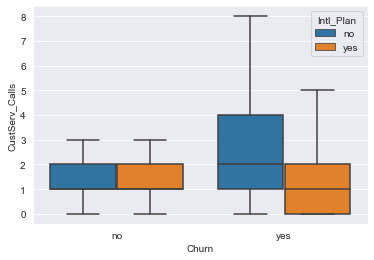

In [52]:

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")


plt.show()

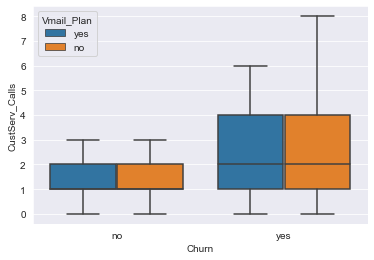

In [53]:

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")


plt.show()

 It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## Preprocessing for Churn Modeling

In [54]:
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0 , 'yes':1})


telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})


telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})


telco_state = pd.get_dummies(telco['State'])


In [55]:
subset2_telco = telco[['Intl_Calls','Night_Mins']]

telco_scaled = StandardScaler().fit_transform(subset2_telco)


telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


## Churn Prediction

In [56]:

telco = telco.drop(telco[['Area_Code','Phone','State']], axis=1)

features = telco.drop(["Churn"], axis=1).columns

In [57]:

X = telco.drop('Churn', axis=1)

y = telco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.954


In [58]:
y_predictions = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_predictions),
    columns=["Predicted False", "Predicted True"],
    index=["Actual False", "Actual True"])
confusion_matrix

,Predicted False,Predicted True
Actual False,857,6
Actual True,40,97


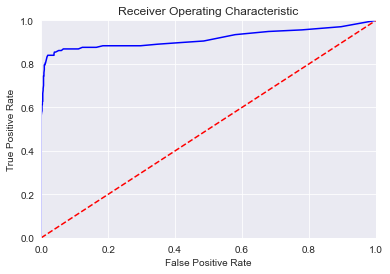

In [59]:

fpr, tpr, threshold = roc_curve(y_test,y_probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

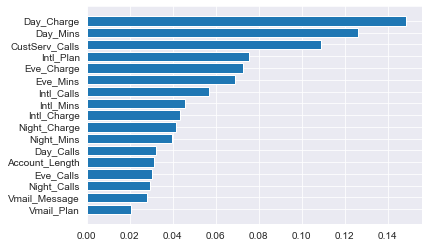

In [60]:

importances = clf.feature_importances_


sorted_index = np.argsort(importances)


labels = X.columns[sorted_index]

plt.clf()


plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()